In [31]:
import os
import random
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plot
import cv2
import numpy as np
import matplotlib.gridspec as gridspec
from random import randint
from IPython.display import SVG
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

In [154]:
import os
import cv2
folder="/Users/eshanchatty/Downloads/Images/EshanHappy"
image=[]
labels=[]
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        resize_img=cv2.resize(img,(150,150))
        image.append(resize_img)
        labels.append("0")
        

In [155]:
folder="/Users/eshanchatty/Downloads/Images/EshanNotHappy"
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        resize_img=cv2.resize(img,(150,150))
        image.append(resize_img)
        labels.append("1")


In [156]:
folder="/Users/eshanchatty/Downloads/Images/AyushHappy"
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        resize_img=cv2.resize(img,(150,150))
        image.append(resize_img)
        labels.append("2")


In [157]:
folder="/Users/eshanchatty/Downloads/Images/AyushNotHappy"
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        resize_img=cv2.resize(img,(150,150))
        image.append(resize_img)
        labels.append("3")


In [168]:
images=np.array(image)
Labels=np.array(labels)

In [169]:
print(images.shape)
print(Labels.shape)

(52, 150, 150, 3)
(52,)


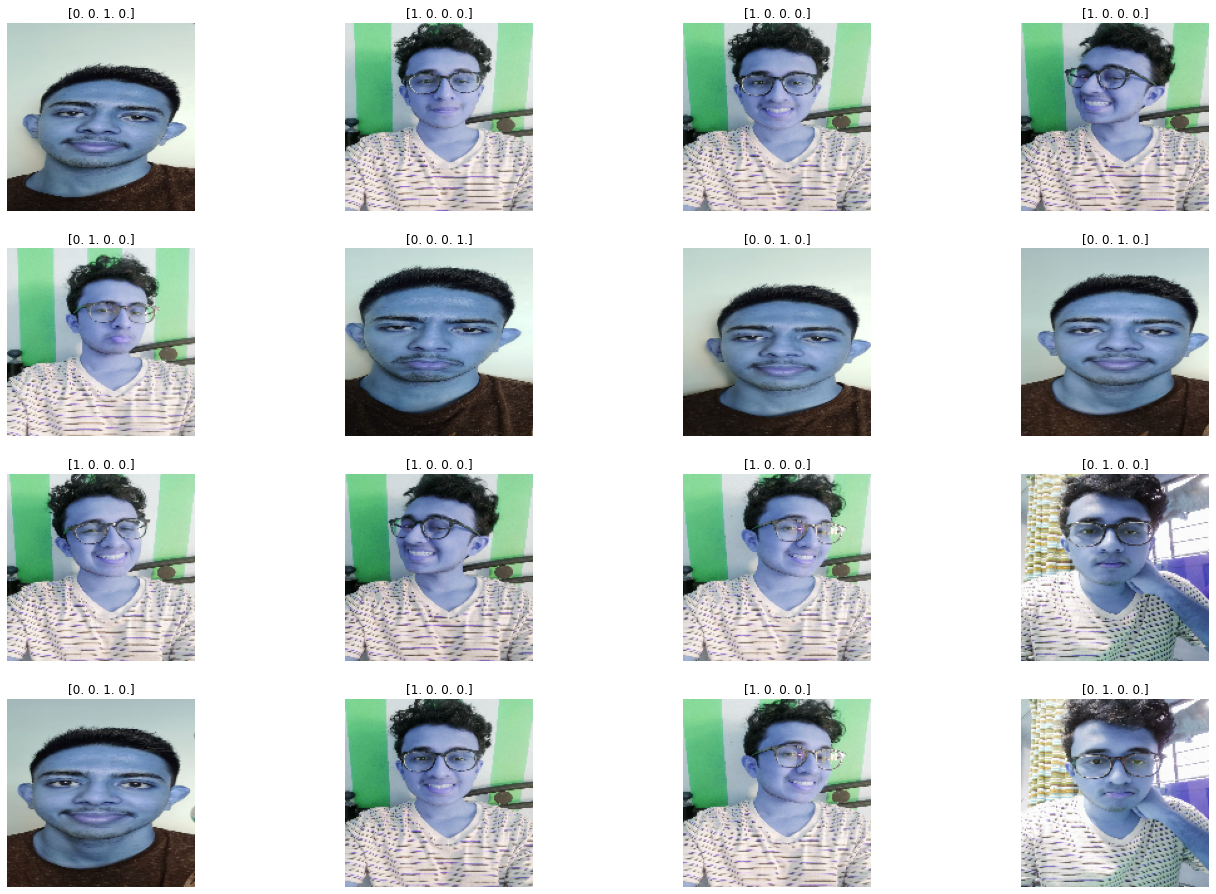

In [219]:
f,ax = plot.subplots(4,4) 
f.subplots_adjust(0,0,3,3)
for i in range(0,4,1):
    for j in range(0,4,1):
        rnd_number = randint(0,len(images))
        ax[i,j].imshow(images[rnd_number])
        ax[i,j].set_title(Labels[rnd_number])
        ax[i,j].axis('off')

In [8]:
import tensorflow as tf
import keras

In [170]:
images=images/255
from keras.utils import to_categorical
Labels=to_categorical(Labels)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer ='rmsprop',
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                

In [20]:
trained = model.fit(images,Labels,epochs=20,validation_split=0.4)

Epoch 1/20
2/2 [==============================] - 1s 264ms/step - loss: 3.3126 - accuracy: 0.3889 - val_loss: 23.9391 - val_accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 142ms/step - loss: 15.7228 - accuracy: 0.4167 - val_loss: 9.3600 - val_accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 133ms/step - loss: 7.3691 - accuracy: 0.3889 - val_loss: 2.4838 - val_accuracy: 0.0417
Epoch 4/20
2/2 [==============================] - 0s 144ms/step - loss: 0.6537 - accuracy: 0.5556 - val_loss: 2.8287 - val_accuracy: 0.3333
Epoch 5/20
2/2 [==============================] - 0s 153ms/step - loss: 0.3902 - accuracy: 0.9167 - val_loss: 3.9041 - val_accuracy: 0.1667
Epoch 6/20
2/2 [==============================] - 0s 149ms/step - loss: 0.7195 - accuracy: 0.6667 - val_loss: 3.5544 - val_accuracy: 0.2917
Epoch 7/20
2/2 [==============================] - 0s 165ms/step - loss: 1.0076 - accuracy: 0.6111 - val_loss: 2.7147 - val_accuracy: 0.3750
Epoch 8/20

In [22]:
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

Saved model to disk
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: CNN.model/assets


In [28]:
folder="/Users/eshanchatty/Downloads/Test"
test=[]
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        resize_img=cv2.resize(img,(150,150))
        test.append(resize_img)

In [35]:
result1=[]
for l in range(len(test)):
  pred_image = np.array([test[l]])
  pred_prob = model.predict(pred_image).reshape(4)
  pred_classes=pred_prob.argmax(axis=-1)
  print(pred_classes)

0
1


# Hence we nee a better model. what if we only used 5 images, and then augmented it?

In [115]:
folder="/Users/eshanchatty/Downloads/Train2/EshanHappy"
train=[]
y=[]
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        resize_img=cv2.resize(img,(300,300))
        train.append(resize_img)
        y.append("0")

In [116]:
folder="/Users/eshanchatty/Downloads/Train2/EshanNotHappy"
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        resize_img=cv2.resize(img,(300,300))
        train.append(resize_img)
        y.append("1")


In [117]:
folder="/Users/eshanchatty/Downloads/Train2/AyushHappy"
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        resize_img=cv2.resize(img,(300,300))
        train.append(resize_img)
        y.append("2")

In [118]:
folder="/Users/eshanchatty/Downloads/Train2/AyushNotHappy"
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        resize_img=cv2.resize(img,(300,300))
        train.append(resize_img)
        y.append("3")

In [119]:
y

['0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3']

In [120]:
train=np.array(train)
y=np.array(y)

In [121]:
y=to_categorical(y)

In [131]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAINING_DIR = '/Users/eshanchatty/Downloads/Train2/'
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=.2,
                                  height_shift_range=.2,
                                  shear_range=.3,
                                  zoom_range=.3,
                                  horizontal_flip=True,
                                  fill_mode='nearest')


In [132]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,batch_size=10,
                                                    target_size=(300, 300),class_mode='categorical')
validation_dir="/Users/eshanchatty/Downloads/Images/"
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator=validation_datagen.flow_from_directory(validation_dir,batch_size=10,target_size=(300,300),class_mode="categorical")

Found 20 images belonging to 4 classes.
Found 59 images belonging to 4 classes.


In [133]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (300,300, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [134]:
model1.compile(optimizer ='rmsprop',
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [135]:
model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 341056)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               43655296  
_________________________________________________________________
dense_25 (Dense)             (None, 4)               

In [136]:
trained1 = model1.fit(train_generator,epochs=25,validation_data=validation_generator)

Epoch 1/25
2/2 [==============================] - 17s 9s/step - loss: 75.1263 - accuracy: 0.1500 - val_loss: 25.8824 - val_accuracy: 0.2542
Epoch 2/25
2/2 [==============================] - 14s 7s/step - loss: 19.3607 - accuracy: 0.2500 - val_loss: 1.9358 - val_accuracy: 0.2542
Epoch 3/25
2/2 [==============================] - 14s 7s/step - loss: 1.5655 - accuracy: 0.2500 - val_loss: 1.4128 - val_accuracy: 0.2542
Epoch 4/25
2/2 [==============================] - 13s 7s/step - loss: 1.5866 - accuracy: 0.2500 - val_loss: 1.3669 - val_accuracy: 0.4237
Epoch 5/25
2/2 [==============================] - 13s 7s/step - loss: 1.3650 - accuracy: 0.4500 - val_loss: 1.3285 - val_accuracy: 0.2881
Epoch 6/25
2/2 [==============================] - 15s 7s/step - loss: 1.3204 - accuracy: 0.4000 - val_loss: 1.3037 - val_accuracy: 0.2712
Epoch 7/25
2/2 [==============================] - 13s 7s/step - loss: 1.3257 - accuracy: 0.4500 - val_loss: 2.0511 - val_accuracy: 0.2373
Epoch 8/25
2/2 [===============

In [137]:
model_json = model1.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model1.h5")
print("Saved model to disk")

model.save('CNN1.model')

Saved model to disk
INFO:tensorflow:Assets written to: CNN1.model/assets


In [146]:
folder="/Users/eshanchatty/Downloads/Test"
test=[]
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        resize_img=cv2.resize(img,(300,300))
        test.append(resize_img)

In [147]:
result1=[]
for l in range(len(test)):
  pred_image = np.array([test[l]])
  pred_prob = model1.predict(pred_image).reshape(4)
  pred_classes=pred_prob.argmax(axis=-1)
  pred=(pred_classes)
  print(pred)

3
2
3
2
3
2
3
3
2
2


In [160]:
TRAINING_DIR = '/Users/eshanchatty/Downloads/Images/'
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=.2,
                                  height_shift_range=.2,
                                  shear_range=.3,
                                  zoom_range=.3,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [171]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,batch_size=10,
                                                    target_size=(150, 150),class_mode='categorical')
validation_dir="/Users/eshanchatty/Downloads/Train2/"
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator=validation_datagen.flow_from_directory(validation_dir,batch_size=10,target_size=(150,150),class_mode="categorical")

Found 52 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [184]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150,150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [185]:
model2.compile(optimizer ='rmsprop',
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [186]:
trained1 = model2.fit(train_generator,epochs=22,validation_data=validation_generator)

Epoch 1/22
6/6 [==============================] - 12s 2s/step - loss: 4.7563 - accuracy: 0.2308 - val_loss: 1.3838 - val_accuracy: 0.2500
Epoch 2/22
6/6 [==============================] - 10s 2s/step - loss: 1.4750 - accuracy: 0.2692 - val_loss: 1.3638 - val_accuracy: 0.2500
Epoch 3/22
6/6 [==============================] - 10s 2s/step - loss: 1.3256 - accuracy: 0.3269 - val_loss: 1.1343 - val_accuracy: 0.3000
Epoch 4/22
6/6 [==============================] - 10s 2s/step - loss: 1.3281 - accuracy: 0.3077 - val_loss: 0.9681 - val_accuracy: 0.5000
Epoch 5/22
6/6 [==============================] - 10s 2s/step - loss: 1.3774 - accuracy: 0.3462 - val_loss: 0.8395 - val_accuracy: 0.6000
Epoch 6/22
6/6 [==============================] - 10s 2s/step - loss: 0.9652 - accuracy: 0.5000 - val_loss: 0.7079 - val_accuracy: 0.6000
Epoch 7/22
6/6 [==============================] - 10s 2s/step - loss: 0.7804 - accuracy: 0.5385 - val_loss: 0.7054 - val_accuracy: 0.5500
Epoch 8/22
6/6 [==================

In [205]:
model_json = model2.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model1.h5")
print("Saved model to disk")

model.save('CNN2.model')

Saved model to disk
INFO:tensorflow:Assets written to: CNN2.model/assets


In [234]:
folder="/Users/eshanchatty/Downloads/Test"
test=[]
for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
        resize_img=cv2.resize(img,(150,150))
        test.append(resize_img)

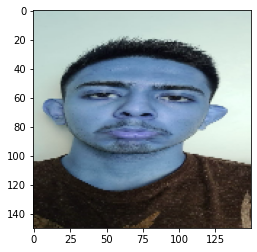

In [235]:
from matplotlib import pyplot as plt
plt.imshow(test[1],cmap=plt.cm.bone)

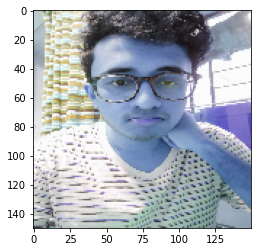

In [236]:
from matplotlib import pyplot as plt
plt.imshow(test[0],cmap=plt.cm.bone)

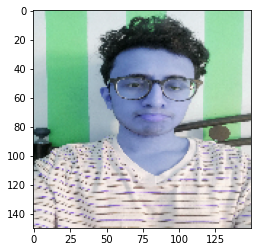

In [238]:
from matplotlib import pyplot as plt
plt.imshow(test[2],cmap=plt.cm.bone)

In [237]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)
result1=[]
for l in range(len(test)):
  pred_image = np.array([test[l]])
  pred_prob = model1.predict(pred_image).reshape(4)
  pred_classes=pred_prob.argmax(axis=-1)
  pred=(pred_classes)
  print(pred)


3
1
1


<Figure size 2160x2160 with 0 Axes>